In [10]:
import glob

import os
from config import RESULTS_DIR

checkpoint_dir = os.path.join(RESULTS_DIR, "checkpoints")

cur_dirs = [f for f in glob.glob(os.path.join(checkpoint_dir, "exp_*"))]
dir_name = os.path.join(checkpoint_dir, f"exp_{len(cur_dirs)}")
print(dir_name)
if not os.path.exists(dir_name):
    os.makedirs(dir_name)


/storage/ice1/1/5/stekin6/rl-focal/results/checkpoints/exp_3


In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from config import RESULTS_DIR
from run import load_arr


checkpoint_dir = os.path.join(RESULTS_DIR, "checkpoints")
select_agent_list = []
ens_agent_list = []
for file_dir in glob.glob(f"{checkpoint_dir}/*"):
    ens_agent_path = os.path.join(file_dir, "train_ens_agent_rewards.npy")
    select_agent_path = os.path.join(file_dir, "train_select_agent_rewards.npy")
    if os.path.exists(select_agent_path):
        select_agent_list.append(load_arr(select_agent_path))
        ens_agent_list.append(load_arr(ens_agent_path))

# select_agent_arr = np.stack(select_agent_list)
# ens_agent_arr = np.stack(ens_agent_list)

# print(select_agent_arr.shape, ens_agent_arr.shape)
# fig, ax = plt.subplots()


In [3]:
def fix_arr(in_list):
    new_arr_list = []
    max_size = max([len(arr) for arr in in_list])
    for input_arr in in_list:
        if len(input_arr) > 0:
            pad_size = max_size - len(input_arr)
            if pad_size > 0:
                pad_arr = np.empty(pad_size)
                pad_arr[:] = np.nan
                new_arr = np.concatenate([input_arr, pad_arr]) 
            else:
                new_arr = input_arr
            new_arr_list.append(new_arr)
    return np.stack(new_arr_list)
    

In [5]:
select_agent_arr = fix_arr(select_agent_list)
ens_agent_arr = fix_arr(ens_agent_list)

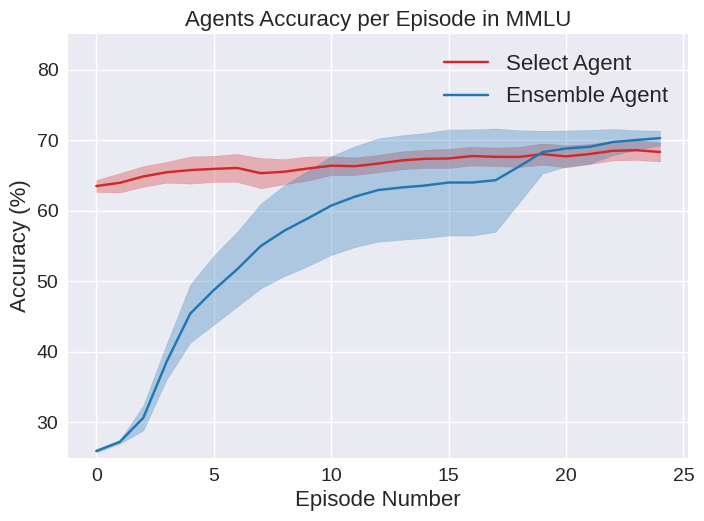

In [46]:
plt.style.use('seaborn-v0_8')

# Set global font size for all elements
plt.rcParams.update({
    'font.size': 14,              # General font size
    'axes.titlesize': 16,         # Title font size
    'axes.labelsize': 16,         # Axis label font size
    'xtick.labelsize': 14,        # X-axis tick font size
    'ytick.labelsize': 14,        # Y-axis tick font size
    'legend.fontsize': 14         # Legend font size
})

fig, ax = plt.subplots()

line_names = ["Select Agent", "Ensemble Agent"]
colors  = ["tab:red", "tab:blue"]
for i, arr in enumerate([select_agent_arr, ens_agent_arr]):
    mu = np.nanmean(arr, axis=0)
    sigma = np.nanstd(arr, axis=0)
    x_axis = np.arange(len(mu))
    ax.plot(x_axis, mu, color=colors[i], label=line_names[i])
    ax.fill_between(x_axis, mu + 0.5 * sigma, mu - 0.5 * sigma, color=colors[i], alpha=0.3)
ax.set_ylim(25, 85)
ax.legend(fontsize=16)
ax.set_xlabel("Episode Number")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Agents Accuracy per Episode in MMLU")
plt.savefig("results/figures/reward_plot.png", dpi=200, bbox_inches="tight")



In [14]:
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [16]:
np.nanmean(select_agent_arr)

array([63.49408059, 63.94808298, 64.84739872, 65.44259802, 65.75323124,
       65.91940915, 66.05083089, 65.31334854, 65.52079939, 65.97045726,
       66.37558379, 66.30009775, 66.66911046, 67.12365591, 67.34726295,
       67.3985826 , 67.73460411, 67.62829912, 67.61765117, 68.01284737,
       67.69724899, 68.02820835, 68.48484848, 68.56584276, 68.31727412])

In [25]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']